# IIA 2024 - Aprendizaje Automatizado
### Lucas Poma
## Trabajo Practico 5


## Definiciones

In [5]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models, Input
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [6]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0
VALIDATION_SIZE = 0.2

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [7]:
def create_model(dropout_rate_conv=0.0, dropout_rate_dense=0.0):
    model = models.Sequential()
    model.add(Input(shape=(32, 32, 3)))
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))

    if dropout_rate_conv > 0:
        model.add(layers.Dropout(dropout_rate_conv))

    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    
    if dropout_rate_dense > 0:
        model.add(layers.Dropout(dropout_rate_dense))
    
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(10))
    
    model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])
    
    return model

In [8]:
def create_data_augmentation_model():
    img_height = 32
    img_width = 32

    dataAugmentation = models.Sequential()
    dataAugmentation.add(Input(shape=(img_height, img_width, 3)))
    dataAugmentation.add(layers.RandomFlip("horizontal"))
    dataAugmentation.add(layers.RandomRotation(0.1))
    dataAugmentation.add(layers.RandomZoom(0.1))

    return dataAugmentation

## Ejercicio 1

In [ ]:
model = create_model()
history = model.fit(train_images, train_labels, epochs=10, validation_split=VALIDATION_SIZE)

In [ ]:
plt.figure(figsize=(18, 5))
plt.plot(1 - np.array(history.history['accuracy']), c='darkorange', label='Error de Entrenamiento', marker='o', linestyle="--")
plt.plot(1 - np.array(history.history['val_accuracy']), c='darkviolet', label='Error de Validacion', marker='o', linestyle="-")
plt.title('Errores de entrenamiento y validación')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend(loc='upper right')

plt.show()

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Error Test Modelo Final: {1 - test_acc}")

Podemos observar como hacia las epocas mas alejadas pareciera comenzar a ocurrir un leve overfitting.

## Ejercicio 2

In [9]:
dropout_rates = [(0.2, 0.0), (0.5, 0.0), (0.2, 0.2), (0.2, 0.5), (0.5, 0.2), (0.5, 0.5)]
histories = []
tests_error = []

for (dropout_rate_conv, dropout_rate_dense) in dropout_rates:
    model = create_model(dropout_rate_conv, dropout_rate_dense)
    history = model.fit(train_images, train_labels, epochs=20, validation_split=VALIDATION_SIZE)
    test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
    tests_error.append(1 - test_acc)
    histories.append(history)

Epoch 1/20
1250/1250 [==============================] - 45s 35ms/step - loss: 1.5925 - accuracy: 0.4062 - val_loss: 1.2831 - val_accuracy: 0.5306
Epoch 2/20
1250/1250 [==============================] - 44s 35ms/step - loss: 1.1576 - accuracy: 0.5859 - val_loss: 1.1043 - val_accuracy: 0.6135
Epoch 3/20
1250/1250 [==============================] - 43s 35ms/step - loss: 0.9689 - accuracy: 0.6585 - val_loss: 0.9869 - val_accuracy: 0.6559
Epoch 4/20
1250/1250 [==============================] - 43s 35ms/step - loss: 0.8394 - accuracy: 0.7059 - val_loss: 0.8939 - val_accuracy: 0.6886
Epoch 5/20
1250/1250 [==============================] - 42s 34ms/step - loss: 0.7501 - accuracy: 0.7365 - val_loss: 0.8337 - val_accuracy: 0.7162
Epoch 6/20
1250/1250 [==============================] - 42s 34ms/step - loss: 0.6793 - accuracy: 0.7631 - val_loss: 0.8160 - val_accuracy: 0.7261
Epoch 7/20
1250/1250 [==============================] - 43s 35ms/step - loss: 0.6133 - accuracy: 0.7835 - val_loss: 0.8952 -

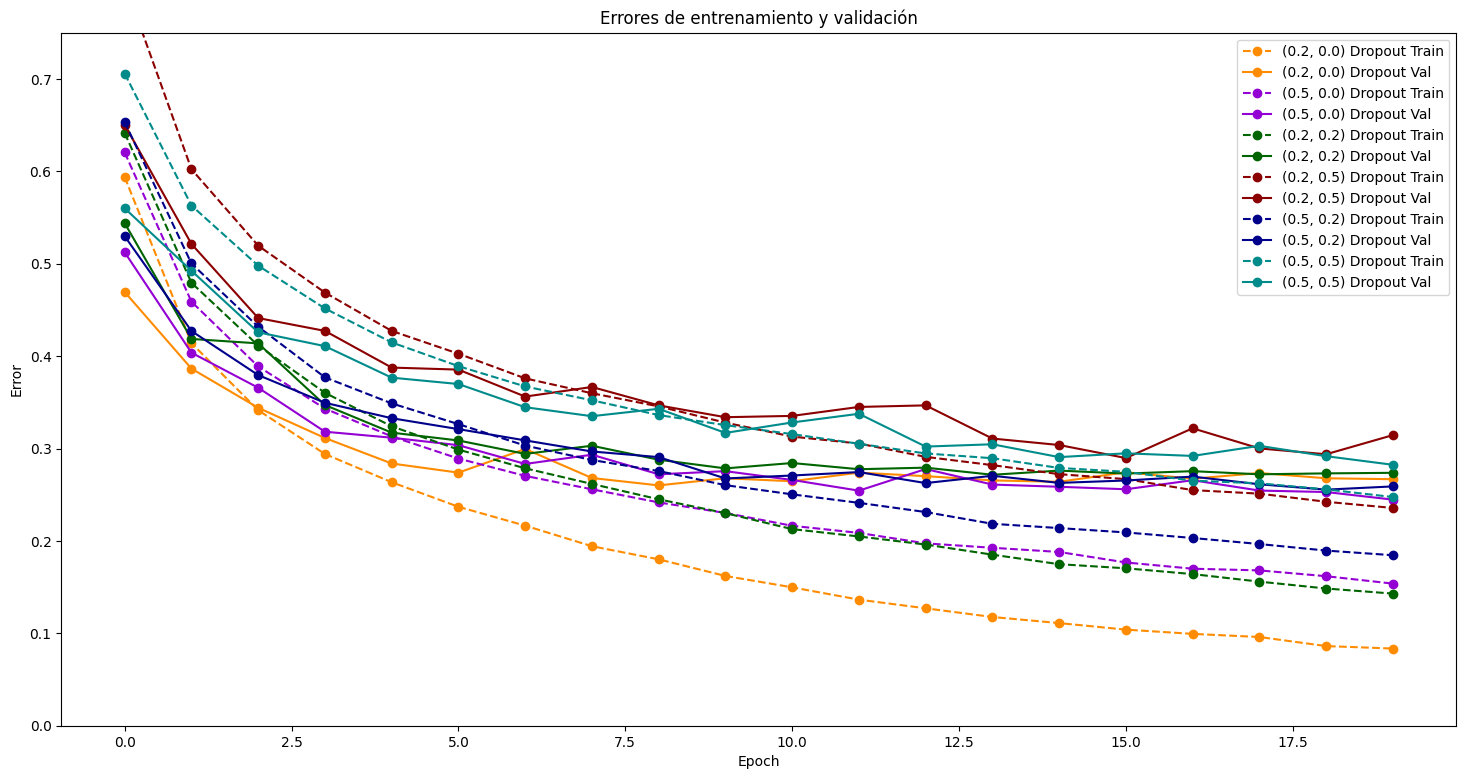

Error Test Modelo (0.2, 0.0) Dropout: 0.2712000012397766
Error Test Modelo (0.5, 0.0) Dropout: 0.24720001220703125
Error Test Modelo (0.2, 0.2) Dropout: 0.2778000235557556
Error Test Modelo (0.2, 0.5) Dropout: 0.3176000118255615
Error Test Modelo (0.5, 0.2) Dropout: 0.25870001316070557
Error Test Modelo (0.5, 0.5) Dropout: 0.28200000524520874


In [11]:
plt.figure(figsize=(18, 9))
plt.plot(1 - np.array(histories[0].history['accuracy']), c='darkorange', label=f'{dropout_rates[0]} Dropout Train', marker='o', linestyle="--")
plt.plot(1 - np.array(histories[0].history['val_accuracy']), c='darkorange', label=f'{dropout_rates[0]} Dropout Val', marker='o', linestyle="-")
plt.plot(1 - np.array(histories[1].history['accuracy']), c='darkviolet', label=f'{dropout_rates[1]} Dropout Train', marker='o', linestyle="--")
plt.plot(1 - np.array(histories[1].history['val_accuracy']), c='darkviolet', label=f'{dropout_rates[1]} Dropout Val', marker='o', linestyle="-")
plt.plot(1 - np.array(histories[2].history['accuracy']), c='darkgreen', label=f'{dropout_rates[2]} Dropout Train', marker='o', linestyle="--")
plt.plot(1 - np.array(histories[2].history['val_accuracy']), c='darkgreen', label=f'{dropout_rates[2]} Dropout Val', marker='o', linestyle="-")
plt.plot(1 - np.array(histories[3].history['accuracy']), c='darkred', label=f'{dropout_rates[3]} Dropout Train', marker='o', linestyle="--")
plt.plot(1 - np.array(histories[3].history['val_accuracy']), c='darkred', label=f'{dropout_rates[3]} Dropout Val', marker='o', linestyle="-")
plt.plot(1 - np.array(histories[4].history['accuracy']), c='darkblue', label=f'{dropout_rates[4]} Dropout Train', marker='o', linestyle="--")
plt.plot(1 - np.array(histories[4].history['val_accuracy']), c='darkblue', label=f'{dropout_rates[4]} Dropout Val', marker='o', linestyle="-")
plt.plot(1 - np.array(histories[5].history['accuracy']), c='darkcyan', label=f'{dropout_rates[5]} Dropout Train', marker='o', linestyle="--")
plt.plot(1 - np.array(histories[5].history['val_accuracy']), c='darkcyan', label=f'{dropout_rates[5]} Dropout Val', marker='o', linestyle="-")
plt.title('Errores de entrenamiento y validación')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend(loc='upper right')

plt.ylim([0, 0.75])

plt.show()

print(f"Error Test Modelo {dropout_rates[0]} Dropout: {tests_error[0]}")
print(f"Error Test Modelo {dropout_rates[1]} Dropout: {tests_error[1]}")
print(f"Error Test Modelo {dropout_rates[2]} Dropout: {tests_error[2]}")
print(f"Error Test Modelo {dropout_rates[3]} Dropout: {tests_error[3]}")
print(f"Error Test Modelo {dropout_rates[4]} Dropout: {tests_error[4]}")
print(f"Error Test Modelo {dropout_rates[5]} Dropout: {tests_error[5]}")

Evaluando todas las combinaciones, el mejor resultado lo obtenemos con 1 sola capa de dropout de 0.5 luego de la ultima capa convolucional. 
Vemos que el modelo con 2 capas ambas al 0.5, resulta ser excesivo, el error de entrenamiento es algo elevado y no logra aprender bien, evidenciado por las curvas del conjunto de validacion y por tener el peor error de test.
Es necesario una mayor cantidad de epocas, pero parecen ser herramientas utiles para evitar el overfitting y asi mejorar algo el error de test final.


## Ejercicio 3

In [10]:
model2 = create_model(0.5, 0.0)

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_25 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 64)             │       262,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 418,506 (1.60 MB)

 Trainable params: 418,506 (1.60 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model3 = create_data_augmentation_model()
model3.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model3.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model3.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model3.add(layers.Dropout(0.5))
model3.add(layers.Flatten())
model3.add(layers.Dense(64, activation='relu'))
model3.add(layers.Dense(128, activation='relu'))
model3.add(layers.Dense(128, activation='relu'))
model3.add(layers.Dense(10))

model3.compile(optimizer='adam',
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            metrics=['accuracy'])

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ random_flip (RandomFlip)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation                 │ (None, 32, 32, 3)      │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_zoom (RandomZoom)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 64)             │       262,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 418,506 (1.60 MB)

 Trainable params: 418,506 (1.60 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
history2 = model2.fit(train_images, train_labels, epochs=20, validation_data=(val_images, val_labels))

test_loss2, test_acc2 = model2.evaluate(test_images, test_labels, verbose=2)
error2 = 1 - test_acc2

history3 = model3.fit(train_images, train_labels, epochs=20, validation_data=(val_images, val_labels))

test_loss3, test_acc3 = model3.evaluate(test_images, test_labels, verbose=2)
error3 = 1 - test_acc3

Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 36s 27ms/step - accuracy: 0.2649 - loss: 1.9432 - val_accuracy: 0.4803 - val_loss: 1.4369
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 33s 26ms/step - accuracy: 0.5037 - loss: 1.3567 - val_accuracy: 0.5585 - val_loss: 1.2082
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 33s 26ms/step - accuracy: 0.5800 - loss: 1.1648 - val_accuracy: 0.6171 - val_loss: 1.0744
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 35s 28ms/step - accuracy: 0.6406 - loss: 1.0116 - val_accuracy: 0.6348 - val_loss: 1.0325
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 33s 26ms/step - accuracy: 0.6793 - loss: 0.9062 - val_accuracy: 0.6612 - val_loss: 0.9645
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 36s 29ms/step - accuracy: 0.7054 - loss: 0.8269 - val_accuracy: 0.6980 - val_loss: 0.8599
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 38s 30ms/step - accuracy: 0.7225 - loss: 0.7892 - val_accuracy: 0.6913 - val_loss: 0.8985
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 37s 30ms/step - accuracy: 0.7437 -

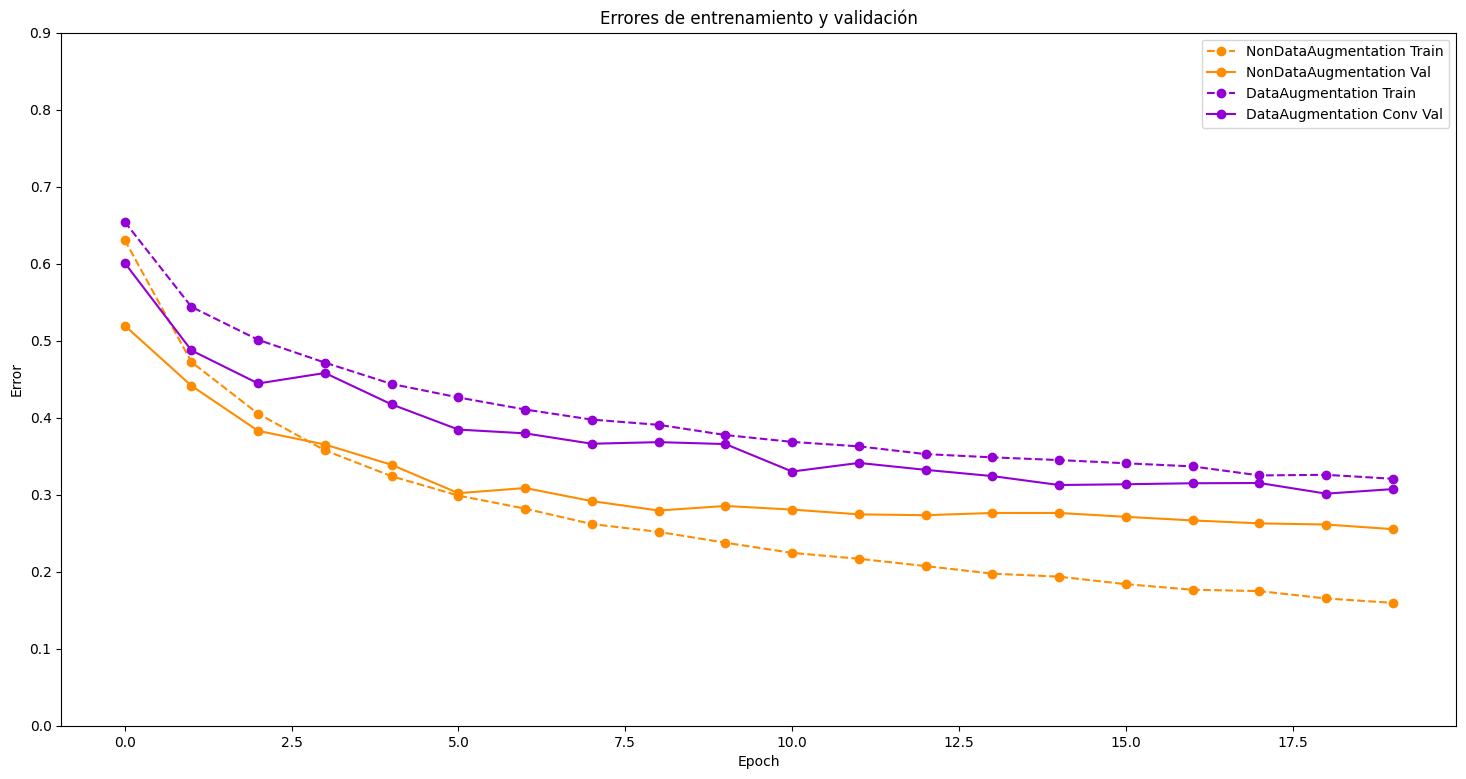

Error Test Modelo NonDataAugmentation: 0.25129997730255127
Error Test Modelo DataAugmentation: 0.307699978351593


In [13]:
plt.figure(figsize=(18, 9))
plt.plot(1 - np.array(history2.history['accuracy']), c='darkorange', label='NonDataAugmentation Train', marker='o', linestyle="--")
plt.plot(1 - np.array(history2.history['val_accuracy']), c='darkorange', label='NonDataAugmentation Val', marker='o', linestyle="-")
plt.plot(1 - np.array(history3.history['accuracy']), c='darkviolet', label='DataAugmentation Train', marker='o', linestyle="--")
plt.plot(1 - np.array(history3.history['val_accuracy']), c='darkviolet', label='DataAugmentation Conv Val', marker='o', linestyle="-")
plt.title('Errores de entrenamiento y validación')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend(loc='upper right')

plt.ylim([0, 0.9])

plt.show()

print(f"Error Test Modelo NonDataAugmentation: {error2}")
print(f"Error Test Modelo DataAugmentation: {error3}")


Podemos observar como con data augmentation no logra aprender bien, evidenciado por el alto error de entrenamiento y algo mas elevado de error de validacion. El error de test tampoco es bueno. Aun asi es una estrategia para evitar el overfitting, tal vez a mayor cantidad de epocas y filtros funcione mejor.


## Ejercicio 4

In [5]:
def getBestModel():
    bestModel = models.Sequential()
    bestModel.add(Input(shape=(32, 32, 3)))
    bestModel.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
    bestModel.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
    bestModel.add(layers.MaxPooling2D((2, 2)))
    bestModel.add(layers.Dropout(0.2))

    bestModel.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    bestModel.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    bestModel.add(layers.MaxPooling2D((2, 2)))
    bestModel.add(layers.Dropout(0.3))

    bestModel.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    bestModel.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    bestModel.add(layers.MaxPooling2D((2, 2)))
    bestModel.add(layers.Dropout(0.4))

    bestModel.add(layers.Flatten())
    bestModel.add(layers.Dense(128, activation='relu'))
    bestModel.add(layers.Dense(128, activation='relu'))
    bestModel.add(layers.Dense(64, activation='relu'))
    bestModel.add(layers.Dense(10))

    bestModel.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])
    return bestModel

In [6]:
bestModel = getBestModel()
history = bestModel.fit(train_images, train_labels, epochs=20, validation_data=(val_images, val_labels))

test_loss, test_acc = bestModel.evaluate(test_images, test_labels, verbose=2)
bestError = 1 - test_acc

Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 67s 51ms/step - accuracy: 0.2564 - loss: 1.9510 - val_accuracy: 0.5115 - val_loss: 1.3398
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 64s 52ms/step - accuracy: 0.5188 - loss: 1.3162 - val_accuracy: 0.6027 - val_loss: 1.1008
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 63s 50ms/step - accuracy: 0.5971 - loss: 1.1158 - val_accuracy: 0.6353 - val_loss: 1.0270
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 62s 49ms/step - accuracy: 0.6407 - loss: 1.0078 - val_accuracy: 0.6804 - val_loss: 0.8963
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 62s 50ms/step - accuracy: 0.6724 - loss: 0.9236 - val_accuracy: 0.6866 - val_loss: 0.8758
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 60s 48ms/step - accuracy: 0.6963 - loss: 0.8629 - val_accuracy: 0.7223 - val_loss: 0.7931
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 62s 49ms/step - accuracy: 0.7183 - loss: 0.8078 - val_accuracy: 0.7253 - val_loss: 0.7973
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 62s 49ms/step - accuracy: 0.7291 -

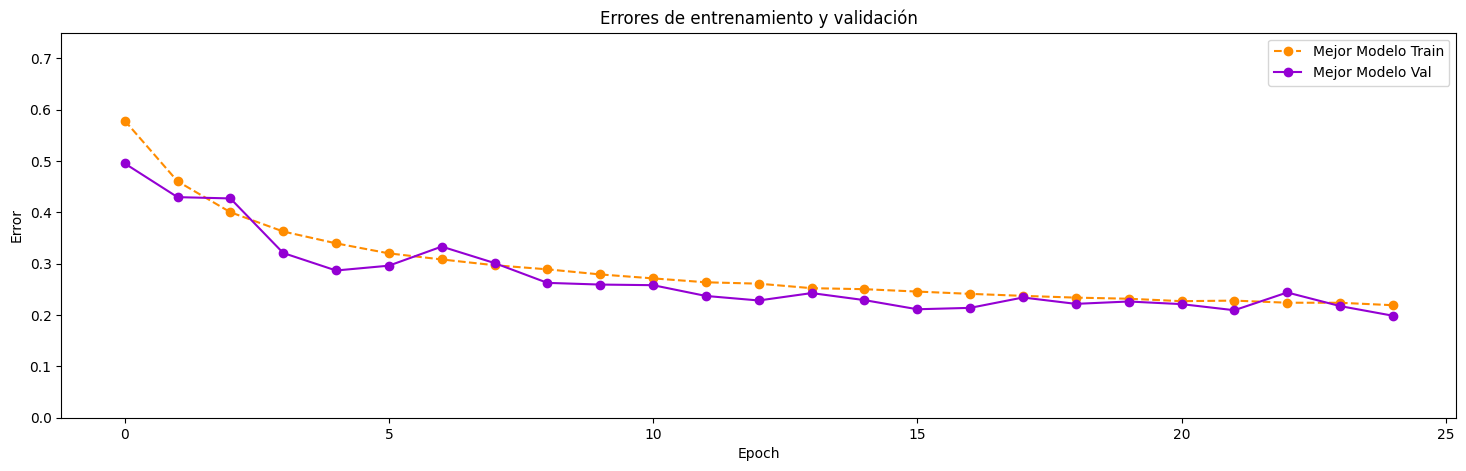

Error Test Mejor Modelo: 0.19880002737045288


In [22]:
plt.figure(figsize=(18, 5))
plt.plot(1 - np.array(history.history['accuracy']), c='darkorange', label='Mejor Modelo Train', marker='o', linestyle="--")
plt.plot(1 - np.array(history.history['val_accuracy']), c='darkviolet', label='Mejor Modelo Val', marker='o', linestyle="-")
plt.title('Errores de entrenamiento y validación')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend(loc='upper right')

plt.ylim([0, 0.75])

plt.show()

print(f"Error Test Mejor Modelo: {bestError}")

## Ejercicio 5

In [12]:
import tensorflow_similarity as tfsim
import tensorflow_similarity.visualization as tfsim_visualization
import tensorflow_similarity.losses as tfsim_losses

/home/pomina/Facu/IAA/IAA/.venv/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Your CPU supports instructions that this binary was not compiled to use: SSE3 SSE4.1 SSE4.2 AVX AVX2
For maximum performance, you can install NMSLIB from sources 
pip install --no-binary :all: nmslib


In [13]:
CLASSES = [0, 1, 2, 3, 4, 5, 8, 9, 6, 7]
NUM_CLASSES = 8
CLASSES_PER_BATCH = NUM_CLASSES
EXAMPLES_PER_CLASS = 10
STEPS_PER_EPOCH = 1000

sampler = tfsim.samplers.MultiShotMemorySampler(
    train_images,
    train_labels,
     classes_per_batch=CLASSES_PER_BATCH,
     examples_per_class_per_batch=EXAMPLES_PER_CLASS,
     class_list=CLASSES[:NUM_CLASSES]  # Only use the first 6 classes for training.
)


The initial batch size is 80 (8 classes * 10 examples per class) with 0 augmentations


indexing classes: 100%|██████████| 31995/31995 [00:00<00:00, 628897.93it/s]


In [14]:
def get_model():
    inputs = tf.keras.layers.Input(shape=(32, 32, 3))

    x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = tf.keras.layers.MaxPooling2D((2, 2))(x)
    x = tf.keras.layers.Dropout(0.2)(x)

    x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = tf.keras.layers.MaxPooling2D((2, 2))(x)
    x = tf.keras.layers.Dropout(0.3)(x)

    x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = tf.keras.layers.MaxPooling2D((2, 2))(x)
    x = tf.keras.layers.Dropout(0.4)(x)

    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(128, activation='relu')(x)
    x = tf.keras.layers.Dense(128, activation='relu')(x)
    x = tf.keras.layers.Dense(64, activation='relu')(x)

    outputs = tfsim.layers.MetricEmbedding(64)(x)
    return tfsim.models.SimilarityModel(inputs, outputs)

model = get_model()

In [15]:
distance = "cosine"  # @param ["cosine", "L2", "L1"]{allow-input: false}
loss = tfsim_losses.MultiSimilarityLoss(distance=distance)

LR = 0.000005  # @param {type:"number"}
model.compile(optimizer=tf.keras.optimizers.Adam(LR), loss=loss)

Distance metric automatically set to cosine use the distance arg to override.


In [16]:
EPOCHS = 20  # @param {type:"integer"}
history = model.fit(sampler, steps_per_epoch=STEPS_PER_EPOCH, epochs=EPOCHS, validation_data=(val_images, val_labels))

Epoch 1/20
1000/1000 [==============================] - 149s 147ms/step - loss: 1.3309 - val_loss: 0.9126
Warmup complete
Epoch 2/20
1000/1000 [==============================] - 146s 146ms/step - loss: 1.3274 - val_loss: 0.9100
Epoch 3/20
1000/1000 [==============================] - 146s 146ms/step - loss: 1.3260 - val_loss: 0.9074
Epoch 4/20
1000/1000 [==============================] - 146s 146ms/step - loss: 1.3246 - val_loss: 0.9023
Epoch 5/20
1000/1000 [==============================] - 145s 145ms/step - loss: 1.3226 - val_loss: 0.8981
Epoch 6/20
1000/1000 [==============================] - 145s 145ms/step - loss: 1.3206 - val_loss: 0.8956
Epoch 7/20
1000/1000 [==============================] - 145s 145ms/step - loss: 1.3190 - val_loss: 0.8928
Epoch 8/20
1000/1000 [==============================] - 145s 145ms/step - loss: 1.3177 - val_loss: 0.8904
Epoch 9/20
1000/1000 [==============================] - 146s 146ms/step - loss: 1.3164 - val_loss: 0.8875
Epoch 10/20
1000/1000 [=======

In [17]:
x_index, y_index = tfsim.samplers.select_examples(train_images, train_labels, CLASSES, 20)
model.reset_index()
model.index(x_index, y_index, data=x_index)

gather examples: 100%|██████████| 200/200 [00:00<00:00, 261571.81it/s]


[Indexing 200 points]
|-Computing embeddings
7/7 [==============================] - 0s 12ms/step
|-Storing data points in key value store
|-Adding embeddings to index.
|-Building index.



0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
***************************************************


In [18]:
labels = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "Unknown"]
num_examples_per_class = 1000
cutpoint = "optimal"

x_confusion, y_confusion = tfsim.samplers.select_examples(test_images, test_labels, CLASSES, num_examples_per_class)

gather examples: 100%|██████████| 10000/10000 [00:00<00:00, 475054.54it/s]


### K = 3

32/32 [==============================] - 0s 12ms/step

Performing NN search



Evaluating: 100%|██████████| 4/4 [00:00<00:00, 2210.44it/s]



 name        value    distance    precision    recall    binary_accuracy        f1
-------  --------  ----------  -----------  --------  -----------------  --------
optimal  0.469136   0.0541356      0.31554  0.914089              0.266  0.469136
313/313 [==============================] - 4s 12ms/step


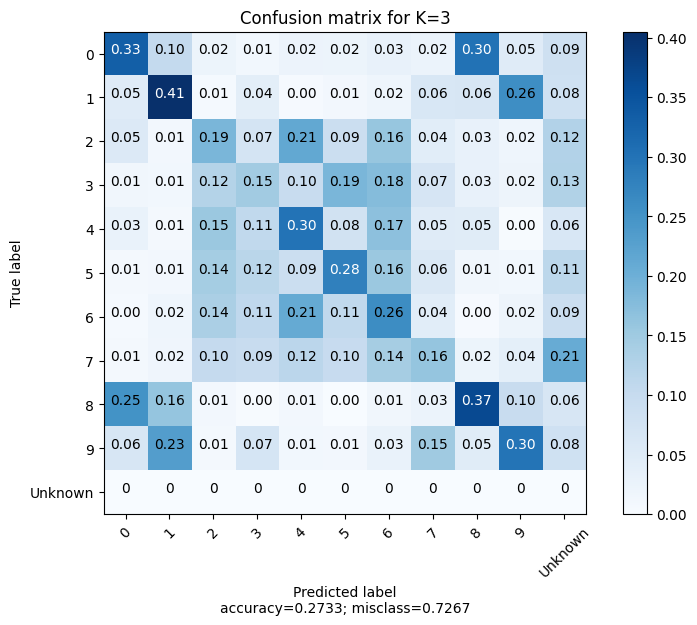

In [22]:
num_calibration_samples = 1000  # @param {type:"integer"}
calibration = model.calibrate(
    train_images[:num_calibration_samples],
    train_labels[:num_calibration_samples],
    extra_metrics=["precision", "recall", "binary_accuracy"],
    verbose=1,
    matcher='match_majority_vote',
    k=3
)

matches = model.match(x_confusion, cutpoint=cutpoint, no_match_label=10)
cm = tfsim_visualization.confusion_matrix(
    matches,
    y_confusion,
    labels=labels,
    title="Confusion matrix for K=3"
)

32/32 [==============================] - 0s 12ms/step

Performing NN search



Evaluating: 100%|██████████| 4/4 [00:00<00:00, 2864.47it/s]



 name        value    distance    precision    recall    binary_accuracy        f1
-------  --------  ----------  -----------  --------  -----------------  --------
optimal  0.493595   0.0584952     0.335656  0.932258              0.289  0.493595
313/313 [==============================] - 4s 12ms/step


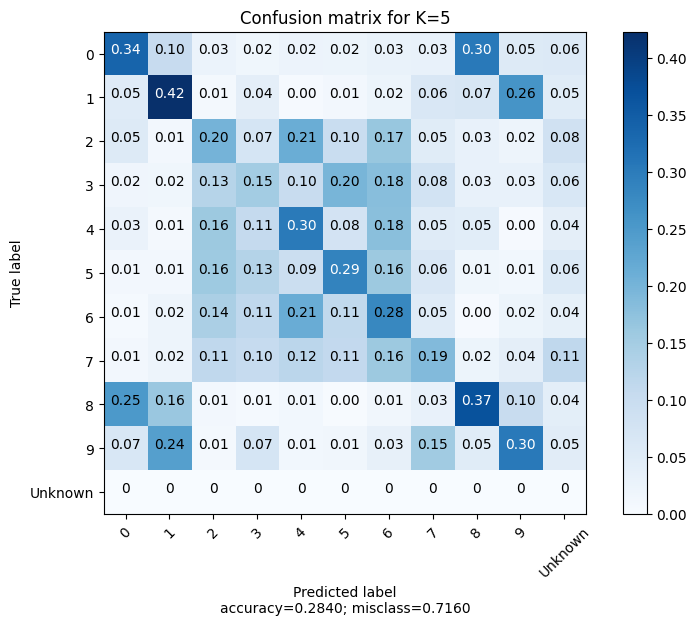

In [23]:
num_calibration_samples = 1000  # @param {type:"integer"}
calibration = model.calibrate(
    train_images[:num_calibration_samples],
    train_labels[:num_calibration_samples],
    extra_metrics=["precision", "recall", "binary_accuracy"],
    verbose=1,
    matcher='match_majority_vote',
    k=5
)

matches = model.match(x_confusion, cutpoint=cutpoint, no_match_label=10)
cm = tfsim_visualization.confusion_matrix(
    matches,
    y_confusion,
    labels=labels,
    title="Confusion matrix for K=5"
)